**Business Case Study: Netflix Data Exploration and Visualization**

*   **Author**: Debojit Gogoi.
*   **EMail**: debojitgogoi.blr@gmail.com
*   **Dataset source** : Kaggle - https://www.kaggle.com/shivamb/netflix-shows
*   **Business problem definition**: Analyze the data and generate insights that could help Netflix which type of shows/movies to produce and how to grow the business.
*   **Declaration**: This dataset does not belong to the author. The author only wants to use the dataset and create insights using opensource tools. The aim of this experiment is learning and no other business motives are addressed.









  

**Step 1: Data loading, understanding and cleanup for exploration**

1.   Load the Netflix dataset.
2.   Understand the structure of the dataset, including column names and data types.
1.   Check for missing values and handle them appropriately.
2.   List item

In [117]:
# import the required libraries for our exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# download the file and create a dataframe
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv" -O netflix.csv


--2024-03-28 17:25:14--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.117, 18.164.173.18, 18.164.173.110, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.1s    

2024-03-28 17:25:15 (29.5 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [118]:
# load the data into a dataframe
df = pd.read_csv('netflix.csv')

In [119]:
# get the details of the dataframe
print(df.shape)
print(df.info())

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


**Observations:**


*   The dataframe has successfully loaded. It consists of 8807 rows and 12 columns
*   Datatype is all objects except for one i.e release_year.



In [120]:
# take a quick look on the dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Observation:**


1.   There are multiple values of NaN (not a number)
2.   There are multiple values in a single entry for director and cast column. Similarly multiple values in single entries for listed_in column. This means that we have to expand the data for every multi value entry. This has to be done to both cast and listed_in column. We shall unstack using split.
1.   From the dataframe it looks like the possibilities of data being a list are for director, cast, country and listed_in columns. Let's start verifying if that is so.


In [121]:
# start with the director data, followed by cast, followed by country, followed by listed_in or genre
l_director = df['director'].apply(lambda x: str(x).split(', ')).to_list()
l_director

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

In [122]:
# l_cast = df['cast'].apply(lambda x: str(x).split(', ')).to_list()
l_cast = df.cast.str.split(", ").to_list() # another way to split the dataframe strings
l_cast

[nan,
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 nan,
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Balint',
 

In [123]:
# l_country = df['country'].apply(lambda x: str(x).split(', ')).to_list()
l_country = df.country.str.split(", ").to_list() # another way to split the dataframe
l_country

[['United States'],
 ['South Africa'],
 nan,
 nan,
 ['India'],
 nan,
 nan,
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 nan,
 nan,
 ['Germany', 'Czech Republic'],
 nan,
 nan,
 ['United States'],
 nan,
 ['Mexico'],
 nan,
 nan,
 nan,
 ['Turkey'],
 nan,
 nan,
 ['India'],
 ['Australia'],
 nan,
 ['United States'],
 ['United States'],
 ['United States', 'India', 'France'],
 nan,
 nan,
 ['United Kingdom'],
 nan,
 nan,
 nan,
 nan,
 ['Finland'],
 ['China', 'Canada', 'United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 nan,
 ['South Africa', 'United States', 'Japan'],
 nan,
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 nan,
 ['United Kingdom'],
 ['India'],
 ['United

In [124]:
l_genre = df['listed_in'].apply(lambda x: str(x).split(', ')).to_list()
l_genre

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Docuseries', 'Reality TV'],
 ['International TV Shows', 'Romantic TV Shows', 'TV Comedies'],
 ['TV Dramas', 'TV Horror', 'TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['British TV Shows', 'Reality TV'],
 ['Comedies', 'Dramas'],
 ['Crime TV Shows', 'Docuseries', 'International TV Shows'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Dramas', 'International Movies'],
 ['Children & Family Movies', 'Comedies'],
 ['British TV Shows', 'Crime TV Shows', 'Docuseries'],
 ['TV Comedies', 'TV Dramas'],
 ['Documentaries', 'International Movies'],
 ['Crime TV Shows', 'Spanish-Language TV Shows', 'TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  'Spanish-Language TV Shows',
  'TV Action & Adventure'],
 ['Crime TV Shows', 'Docuseries', 'International



*   Since we observe that there are multiple values in various columns, its much better that we expand all values to individual rows.
*   Another item to do is to verify if the rest of the data is good.



In [125]:
# check the count of null values in the dataframe
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Observations:**


1.   We need to detect, remove and replave the null values with useful data.
2.   But we cannot start imputing as the director, cast and similar columns with null data have list values. This means that the first course of action is to unstack and then check for Null/NaN replacement.



In [126]:
# check for unique values in the df
for i in df.columns:
  print(f"{i} : {df[i].nunique()}") #using f-string makes it more readable

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [127]:
# check for unique values in the df
for i in df.columns:
  print(f"{i} : {df[i].nunique()}")

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [128]:
# check the number of occurance for rating
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

**Observations:**

*   We observe that the data counts include some items that refer to miinutes rather than ratings.
*   Should we delete these inserts as mis-information? How did they occur?
*   These inserts may have occurred due to human error. They may be caused as a compensated missed entry in a certain column.
*   We should not delete these inserts but rather than start cleaning them up with meaningful data. This will be carried on later.





In [129]:
# let's start with expanding the data. This is part of the data cleanup exercise.
# expand data for every item in the series
# rather than rewriting the same code for mutiple columns we shall create a function that can be re-used. The return will be a dataframe.
def clean_dataframe(col_name, col_renamed):
  df[f'{col_name}'] = df[f'{col_name}'].astype(str) # column contains float values, convert them into strings
  # Step 1: create a new data frame with title as index
  new_df = pd.DataFrame(df[f'{col_name}'].apply(lambda x: str(x).split(', ')).to_list(), index=df.title).stack()
  # Step 2: reset the index
  new_df = pd.DataFrame(new_df.reset_index())
  # Step 3: Rename the column with director values and drop the level_1 column
  new_df.rename(columns={0:f'{col_renamed}'},inplace=True)
  new_df.drop(['level_1'],axis=1,inplace=True)
  return new_df

# expand column director and rename the required column to "Directors"
new_df_directors = clean_dataframe('director', 'Directors')
# print(new_df_directors.head())

# similarly expand cast and rename the required column to "Cast"
new_df_cast = clean_dataframe('cast', 'Cast')
# print(new_df_cast.head())

# similarly expand country and rename the required column to "Country"
new_df_country = clean_dataframe('country', 'Country')
# print(new_df_country.head())

# similarly expand listed_in and rename the required column to "Genre"
new_df_genre = clean_dataframe('listed_in', 'Genre')
print(new_df_genre.head())


                  title                   Genre
0  Dick Johnson Is Dead           Documentaries
1         Blood & Water  International TV Shows
2         Blood & Water               TV Dramas
3         Blood & Water            TV Mysteries
4             Ganglands          Crime TV Shows


In [130]:
# merge dataframes and create a new dataframe
new_df = new_df_directors.merge(new_df_cast, on=['title'], how='inner').merge(new_df_country, on=['title'], how='inner').merge(new_df_genre, on=['title'], how='inner')
new_df.head()

,title,Directors,Cast,Country,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows


In [131]:
# fill in redundant data with something meaningful. nan with Unknown.
# new_df['Directors'] = new_df['Directors'].fillna("Unknown")
# the above command did not work, as fillna only works for Nan and np.isnan=True and not string
# user replace
# best_answer_imputation = new_df.groupby(['Genre', 'Cast', 'Country']).agg({"Directors":"nunique"})
# best_answer_imputation
new_df['Directors'].replace(['nan'], ['Unknown Director'], inplace=True)
new_df['Cast'].replace(['nan'], ['Unknown Cast'], inplace=True)
new_df['Country'].replace(['nan'], [np.nan], inplace=True)
new_df.head()

,title,Directors,Cast,Country,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows


In [132]:
# merge the computed new_df to the original dataframe
final_df = new_df.merge(df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration']], on=['title'], how='left')
final_df.head()

,title,Directors,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [133]:
# check for nulls
final_df.isnull().sum()

title               0
Directors           0
Cast                0
Country         11897
Genre               0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

**Observation:**


*   Its observed that there are still nulls.
*   Let's start to remove these starting from lowest first.



In [134]:
# the duration cannot be null. Easiest way to impude the data is to use the corresponding value from rating
final_df.loc[final_df['duration'].isnull(),'duration'] = final_df.loc[final_df['duration'].isnull(),'duration'].fillna(final_df['rating'])
final_df.loc[final_df['rating'].str.contains('min', na = False),'rating'] = 'NR'
final_df.isnull().sum()

title               0
Directors           0
Cast                0
Country         11897
Genre               0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [135]:
# next is rating. Rating also cannot be none. Easiest way is to add NR or Not-Rated.
final_df.loc[final_df['rating'].str.contains('min', na = False),'rating'] = 'NR'
final_df['rating'].fillna('NR', inplace = True)
final_df.isnull().sum()
# imputed_director_data = final_df.groupby(['Genre', 'Cast', 'Country', 'rating'])['Directors'].agg(lambda x: x.mode()[0])
# imputed_director_data

title               0
Directors           0
Cast                0
Country         11897
Genre               0
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [136]:
# next is date added. It is related to release year.
# impude with corresponding mode values that had null for release date but release year had value
arr_null_years = final_df[final_df['date_added'].isnull()]['release_year'].unique()
# loop over and first fetch imputation
for item in arr_null_years:
  imputation = final_df[final_df['release_year']==item]['date_added'].mode().values[0]
  # second apply imputation
  final_df.loc[final_df['release_year']==item,'date_added']=final_df.loc[final_df['release_year']==item,'date_added'].fillna(imputation)
final_df.isnull().sum()

title               0
Directors           0
Cast                0
Country         11897
Genre               0
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [137]:
# country is imputed on directors
# a country with null values will have a director who have worked in different countries.
# this way we can use mode of country for directors and impude the data
# Step 1: Write a common function that can take col_name as parameter.
# Step 2: Impude data based on the col_name on Country column
# Step 3: Fill in any nulls if still present with "Unknown"
def fill_missing_country(df, col_name):
    arr_null_countries = df[df['Country'].isnull()][f'{str(col_name)}'].unique()
    arr_non_null_countries = df[~df['Country'].isnull()][f'{str(col_name)}'].unique()
    for person in arr_null_countries:
        if person in arr_non_null_countries:
            mode_country = df[df[f'{col_name}'] == person]['Country'].mode().values
            if len(mode_country) > 0:
                imp = mode_country[0]
                df.loc[(df['Directors'] == person) & (df['Country'].isnull()), 'Country'] = imp
    return df

fill_missing_country(final_df, "Directors") # impude based on Directors
fill_missing_country(final_df, "Cast") # impude based on Cast
final_df['Country'].fillna('Unknown',inplace=True) # fill in details as unknown if nulls are still left

In [138]:
final_df.isnull().sum()

title           0
Directors       0
Cast            0
Country         0
Genre           0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [139]:
# next is the duration
# remove the mins word. We cannot use both season and minutes
# create a clone column and replace all the seasons with 0
# create multiple bins and divide all users in bins
final_df['duration']=final_df['duration'].str.replace(" min","")
final_df['duration_clone'] = final_df['duration'].copy()
final_df_clone = final_df.copy()
final_df_clone.loc[final_df_clone['duration_clone'].str.contains('Season'),'duration_clone']=0
final_df_clone['duration_clone'].value_counts() #we observe that there are 3 occurance of NR
final_df_clone['duration_clone'] = final_df_clone['duration_clone'].replace('NR', 0) # replace NR with 0
final_df_clone['duration_clone'] = final_df_clone['duration_clone'].astype('int') # convert to int
final_df_clone.head()

,title,Directors,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration,duration_clone
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [140]:
final_df_clone['duration_clone'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_clone, dtype: float64

**Observation:**


*   Majority of the movies are more than 1 HR and less than 2 HRs
*   75% of movies are less than 2 HRs
*   Max length of movie is over 5 HRs. This probably is a series.




<ipython-input-141-021b6339c5d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df_clone['duration_clone'], hist=True, kde=True,


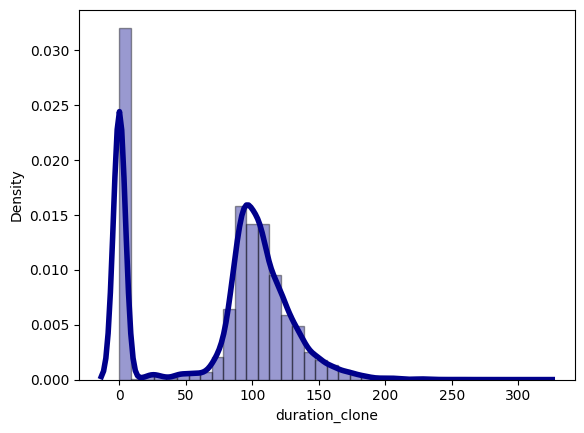

In [141]:

sns.distplot(final_df_clone['duration_clone'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show() #borrow the same idea from reference file

In [142]:
# create bins and divide all duration to specific bins, borrowed idea similar to reference
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
final_df_clone['duration_clone'] = pd.cut(final_df_clone['duration_clone'],bins=bins1,labels=labels1)
# places where we do not have Season as a word will be replaced by the bin that was created.
final_df_clone.loc[~final_df_clone['duration'].str.contains('Season'),'duration']=final_df_clone.loc[~final_df_clone['duration'].str.contains('Season'),'duration_clone'] #duration column changed to categorical
final_df_clone.drop(['duration_clone'],axis=1,inplace=True) #drop the cloned duration column
final_df_clone.head()

,title,Directors,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [143]:
final_df_clone['duration'].value_counts()

80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [144]:
from datetime import datetime # borrowed from reference
from dateutil.parser import parse
arr = list() # create empty array
for i in final_df_clone['date_added'].values:
  dt1 = parse(i)
  arr.append(dt1.strftime('%Y-%m-%d')) # append the parsed date in yyyy-mm-dd format to the empty array object by object
final_df_clone['modified_added_date'] = arr # create a new column and add the arr values to column
final_df_clone['modified_added_date'] = pd.to_datetime(final_df_clone['modified_added_date']) # change string date format to datetime
final_df_clone['month_added'] = final_df_clone['modified_added_date'].dt.month # put month added from datetime string to new column
final_df_clone['week_added'] = final_df_clone['modified_added_date'].dt.isocalendar().week # put week added from datetime string to new column
final_df_clone['year'] = final_df_clone['modified_added_date'].dt.year # put year added from datetime string to new column
final_df_clone.head()

,title,Directors,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration,modified_added_date,month_added,week_added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [145]:
# rename all columns to lower case. This should have been done early but its okay to do now
final_df_clone.rename(columns = {'Directors':'directors', 'Cast':'cast', 'Country':'country', 'Genre':'genre'}, inplace = True)

In [146]:
final_df_clone.head()

,title,directors,cast,country,genre,show_id,type,date_added,release_year,rating,duration,modified_added_date,month_added,week_added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [147]:
# check value counts for all
# we found that there are entries with an extra comma and this is causing an additional data line
# we need to remove this error
# final_df_clone.Country.value_counts()
final_df_clone['country'] = final_df_clone['country'].str.replace(',', '')
final_df_clone.country.value_counts()

United States     64646
India             23845
United Kingdom    12977
Japan              8864
France             8315
                  ...  
Panama                2
Mongolia              2
Kazakhstan            1
Nicaragua             1
Uganda                1
Name: country, Length: 124, dtype: int64

In [148]:
# def impute_director(df):
#     # Group by 'Genre', 'Cast', 'Country', 'rating'
#     # grouped = df.groupby(['Genre', 'Cast', 'Country'])['Directors'].agg(lambda x:x.value_counts().index[0])
#     grouped = df.groupby(['Genre', 'Cast', 'Country'])['Directors'].agg(pd.Series.mode)
#     print(grouped)

    # # Calculate mode directors for each group
    # mode_directors = grouped['Directors'].apply(pd.Series.mode)
    # mode_directors = grouped
    # print(mode_directors)

    # # Replace 'Unknown Director' with mode directors
    # # df['Directors_Clone'] = np.where(df['Directors_Clone'] == 'Unknown Director', mode_directors, df['Directors_Clone'])
    # df.loc[df['Directors'] == 'Unknown Director', 'Directors'] = mode_directors[df['Directors'] == 'Unknown Director']


# # Example usage:
# impute_director(final_df_clone)
# # final_df_clone.head()

In [149]:
# # Merge final_df with imputed_director_data
# merged_df = pd.merge(final_df, imputed_director_data, on=['Genre', 'Cast', 'Country', 'rating'], suffixes=('', '_mode'), how='left')

# # Fill NaN values in 'Directors' column with mode director
# merged_df['Directors'] = merged_df.apply(lambda row: row['Directors_mode'] if row['Directors'] == 'Director N/A' else row['Directors'], axis=1)

# # Drop the mode director columns as they are no longer needed
# merged_df.drop(columns=['Directors_mode'], inplace=True)

# # Now merged_df contains the replaced values
# merged_df

# counts = merged_df.groupby('Directors').size()

# print(counts)

# **Number of movies VS Number of series**

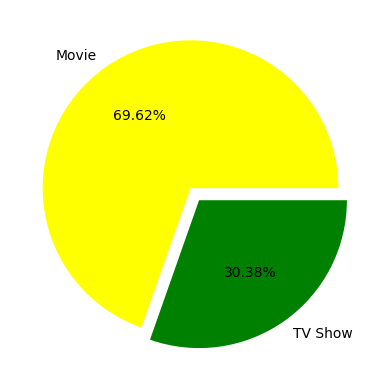

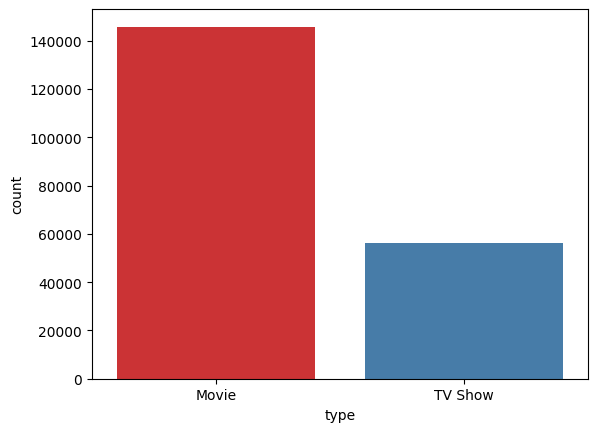

In [150]:
# Pie chart is not really suitable but presents a good view
# Countplot is more effective
data = final_df_clone.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(data['title'],explode=(0.05,0.05), labels=data['type'],colors=['yellow','green'],autopct='%.2f%%')
plt.show()
# OR
sns.countplot(x = 'type', data = final_df_clone, palette = 'Set1', hue='type', legend=False)
plt.show()

**Observation:**


*   Movies hold a higher percentage of created content.
*   TV Shows are little less than half of movies.



# Which country create most number of shows or movies in Netflix?

<Axes: title={'center': 'Top 15 Countries on the basis of Content Creation'}, xlabel='count', ylabel='country'>

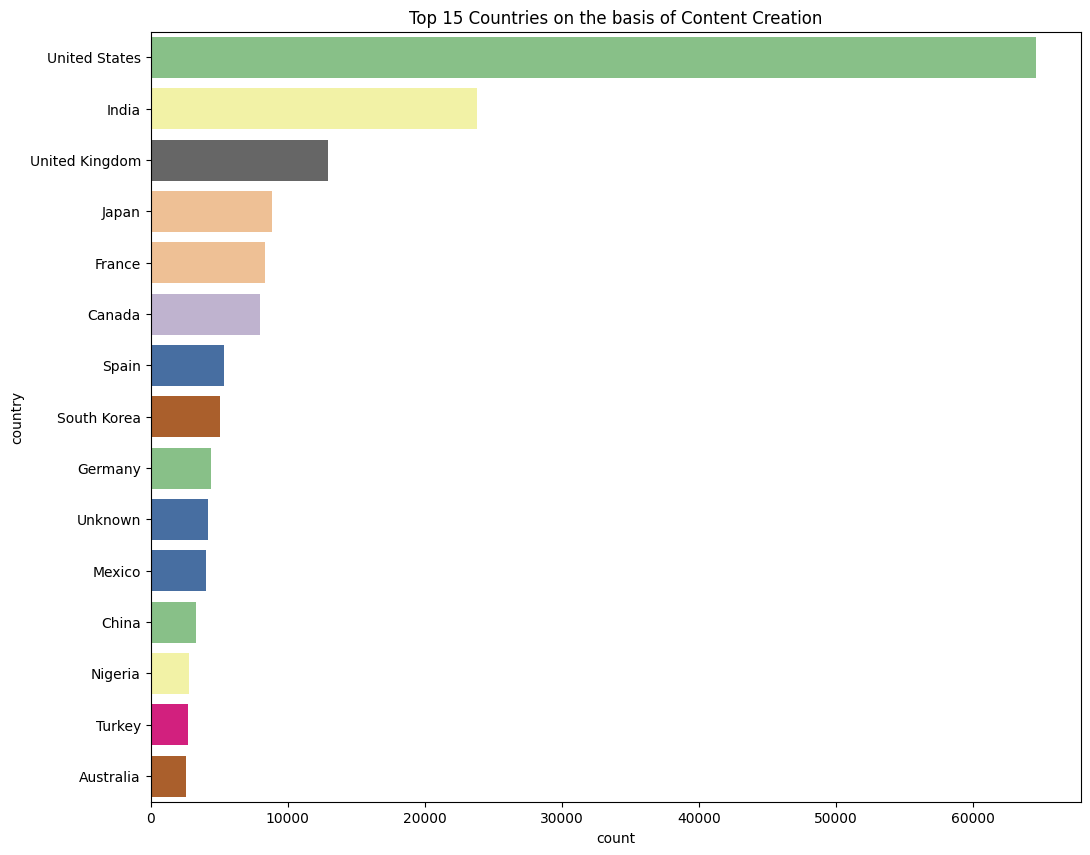

In [151]:
# countplot is most suitable
plt.figure(figsize=(12,10))
plt.title('Top 15 Countries on the basis of Content Creation')
sns.countplot(data=final_df_clone, y='country', order=final_df_clone['country'].value_counts().index[0:15], palette='Accent', hue='country', legend=False)

**Observations:**


*   United states, India and United Kingdom are the top 3 candidates that create content.
*   United States leads the chart by producing more that twice the content created by the number 2 i.e India



# In which year the highest number of shows and movies were added?

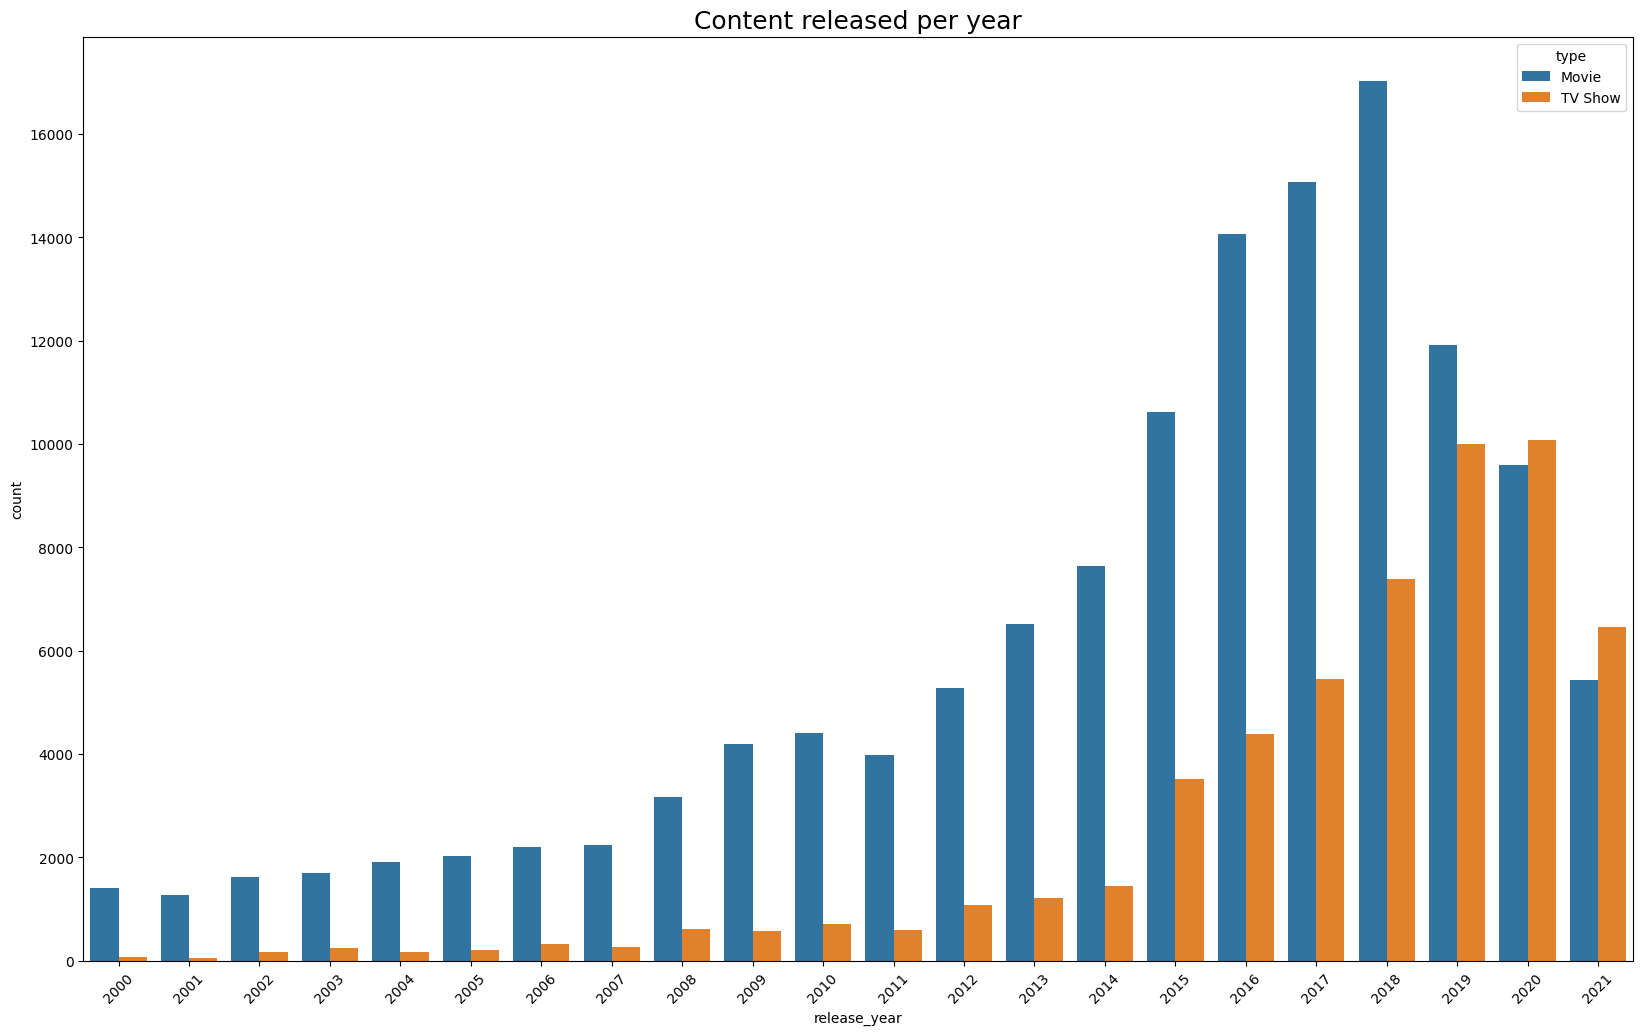

In [152]:
# use count plot
plt.figure(figsize=(20,12))
plt.title('Content released per year', size=18)
filtered_df = final_df_clone[final_df_clone['release_year'] >= 2000]
sns.countplot(x='release_year', hue='type', data=filtered_df.sort_values(by='release_year'))
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

**Observations:**


*   2018 was the year when highest number of shows and movies were added
*   2019 observed a decline in movie production and an increase in TV Shows. This means that Netflix has started to focus more on shows.




# Which Genre had most movies Vs which Genre had most TV Shows. Top 15 results

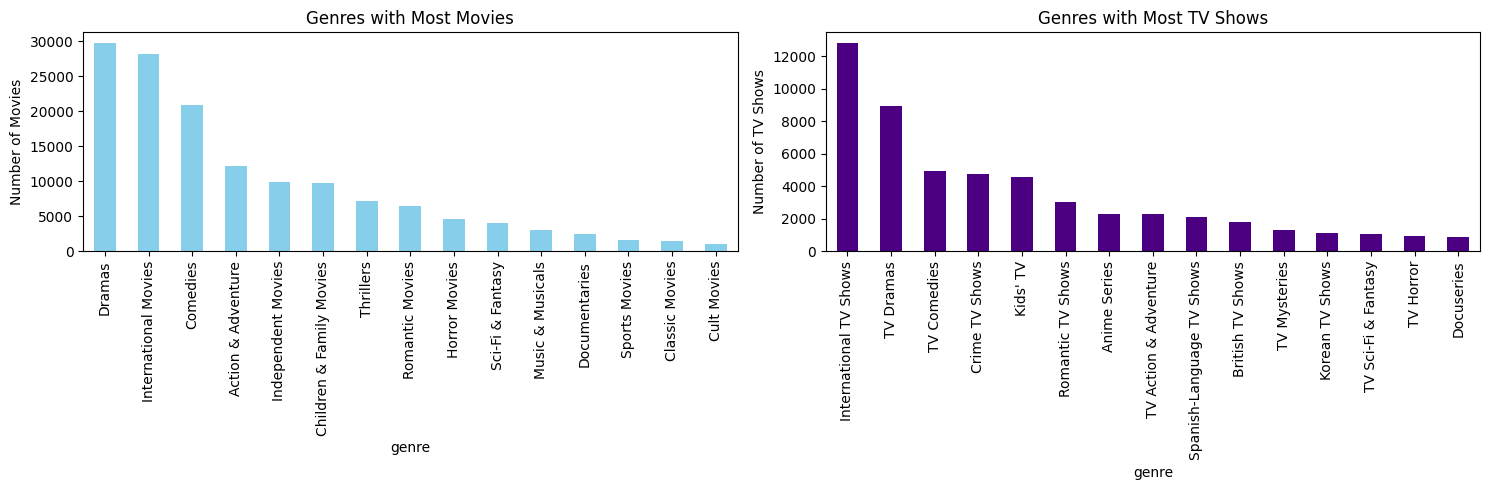

In [153]:
# Step 1: Group by 'Genre' and count the occurrences of each genre
genre_counts = final_df_clone.groupby('genre')['type'].value_counts().unstack(fill_value=0)

# Step 2: Plotting definition for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Step 3: Plotting the genre with the most movies
genre_counts['Movie'].sort_values(ascending=False)[:15].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Genres with Most Movies')
axes[0].set_ylabel('Number of Movies')

# Step 4: Plotting the genre with the most TV shows
genre_counts['TV Show'].sort_values(ascending=False)[:15].plot(kind='bar', ax=axes[1], color='indigo')
axes[1].set_title('Genres with Most TV Shows')
axes[1].set_ylabel('Number of TV Shows')

plt.tight_layout()
plt.show()

**Observations:**


*   Dramas had the highest number of Movies. And International TV shows had the highest for TV Shows.
*   However the count of movies is substantially higher than the count of TV shows.



# Which director had more movies?

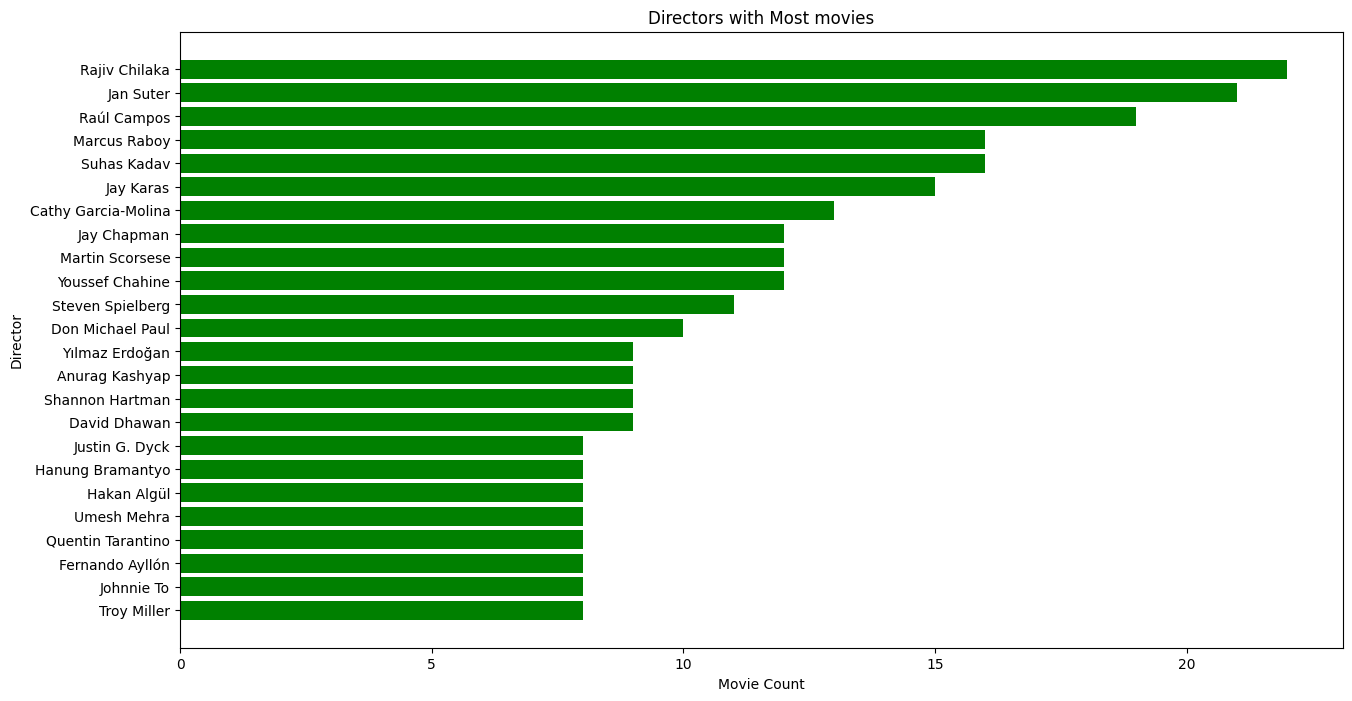

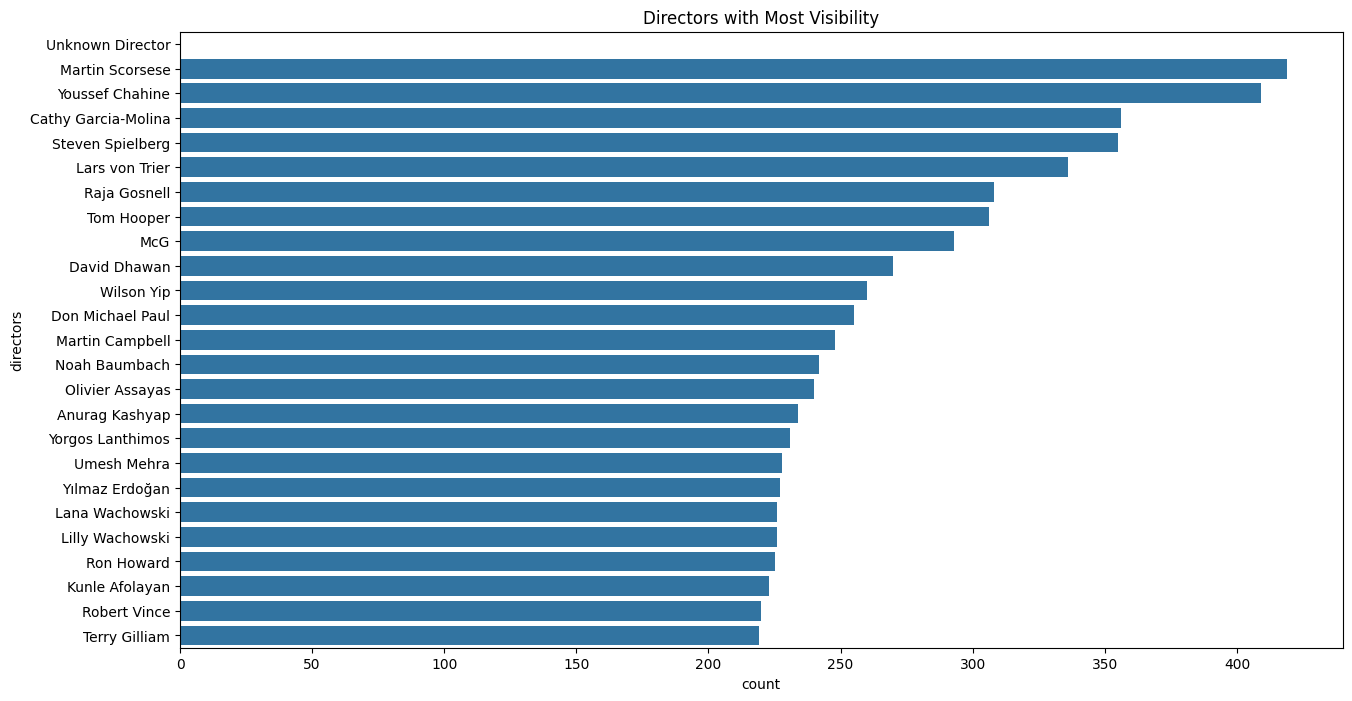

In [154]:
# find number of movie titles filtered on directors
# final_df_clone.groupby(['directors']).agg({"title":"nunique"})
df_directors = final_df_clone.groupby(['directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:25]
df_directors = df_directors[df_directors['directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.title('Directors with Most movies')
plt.barh(df_directors[::-1]['directors'], df_directors[::-1]['title'],color=['green'])
plt.xlabel('Movie Count')
plt.ylabel('Director')
plt.show()
# OR
plt.figure(figsize=(15,8))
plt.title('Directors with Most Visibility')
filtered_df = final_df_clone[final_df_clone['directors'] != 'Unknown Director']
sns.countplot(y='directors', data=filtered_df, order=final_df_clone['directors'].value_counts().index[:25])
plt.show()

**Observation:**


*   Rajiv Cholaka, Jan Suter and Raul Campos are the most popular directors
*   Martin Scorsese, Youssef Chahine, Cathy Garcia-Molina are the most visible



# Cast with the most number of movies

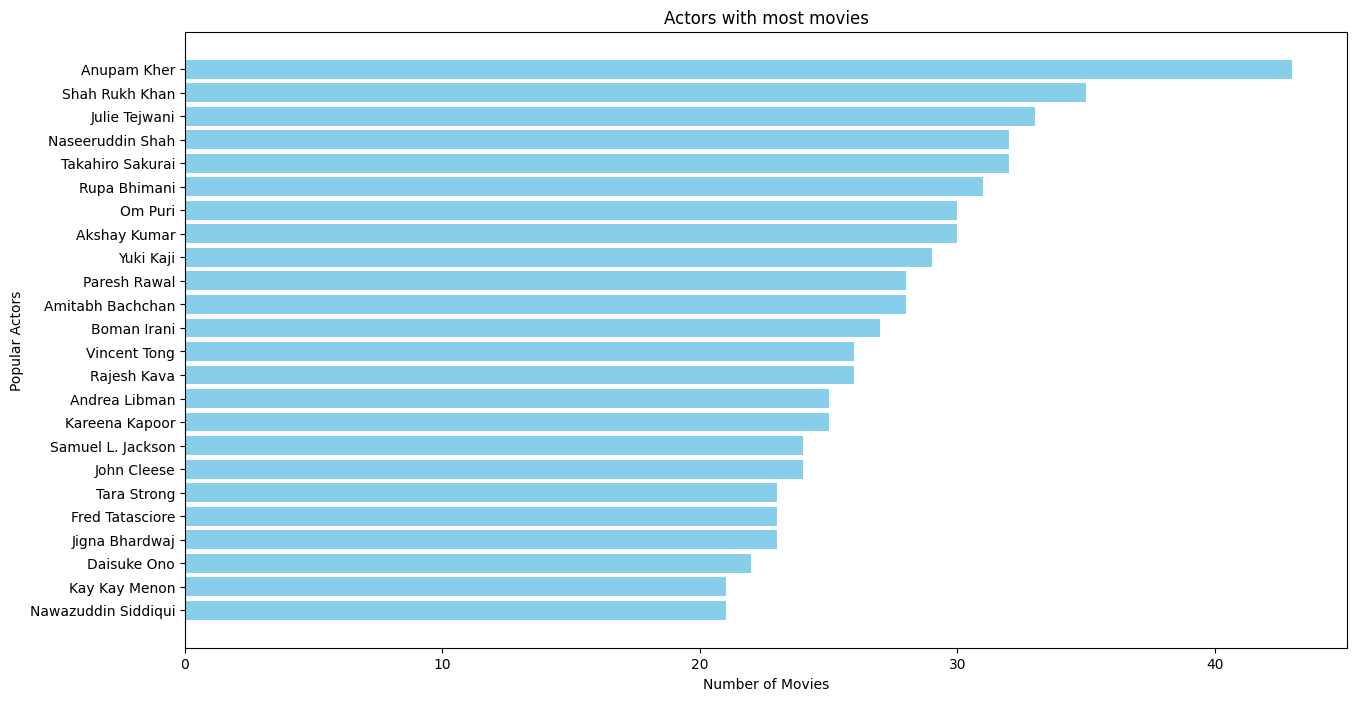

In [155]:
df_actors = final_df_clone.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:25]
df_actors = df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.title("Actors with most movies")
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['skyblue'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

**Observations:**


*   Anupam Kher is the most popular actor.
*   Indian actors top the list.


In [156]:
final_df_clone.head()

,title,directors,cast,country,genre,show_id,type,date_added,release_year,rating,duration,modified_added_date,month_added,week_added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


# Average seasons per TV Show


<ipython-input-157-a247511d7541>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(duration_series)


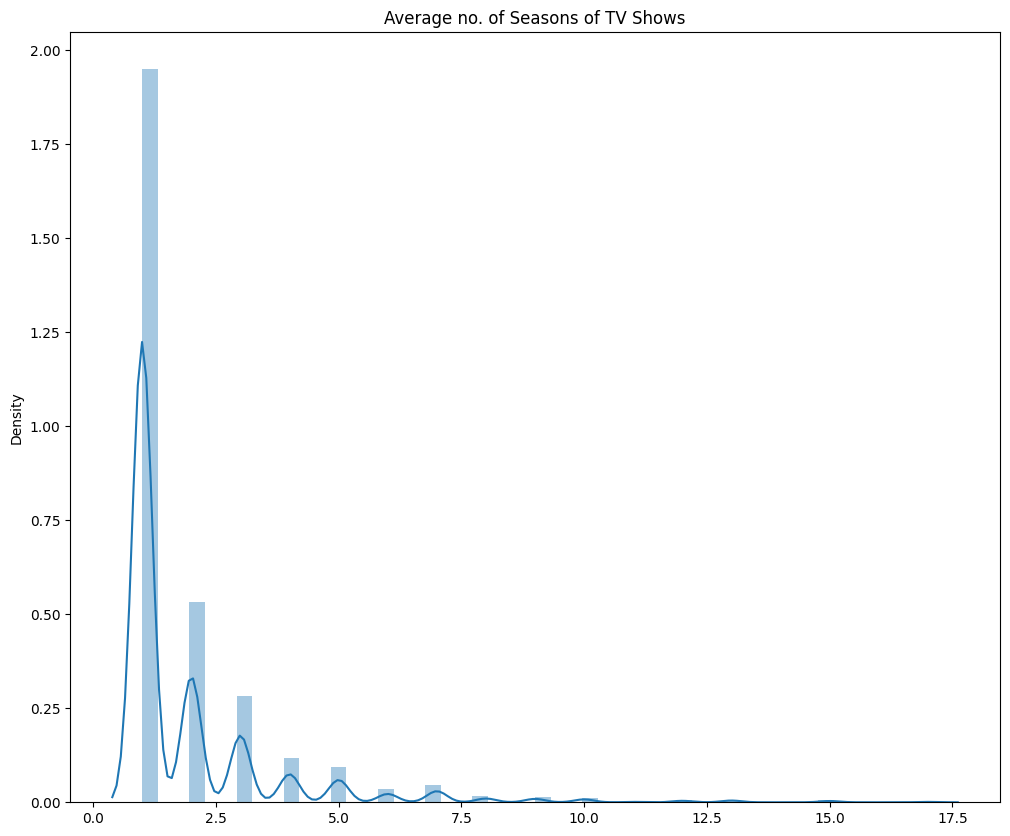

In [157]:
series = final_df_clone[final_df_clone['type']=='TV Show']
duration_series = []
for i in series['duration']:
    duration_series.append(int(i.strip('Season')))

plt.figure(figsize=(12,10))
plt.title('Average no. of Seasons of TV Shows')
sns.distplot(duration_series)
plt.show()

**Observation:**


*   Most TV Shows in Netflix have at least 1 season.




# Movie/TV Shows with the most ratings based on titles

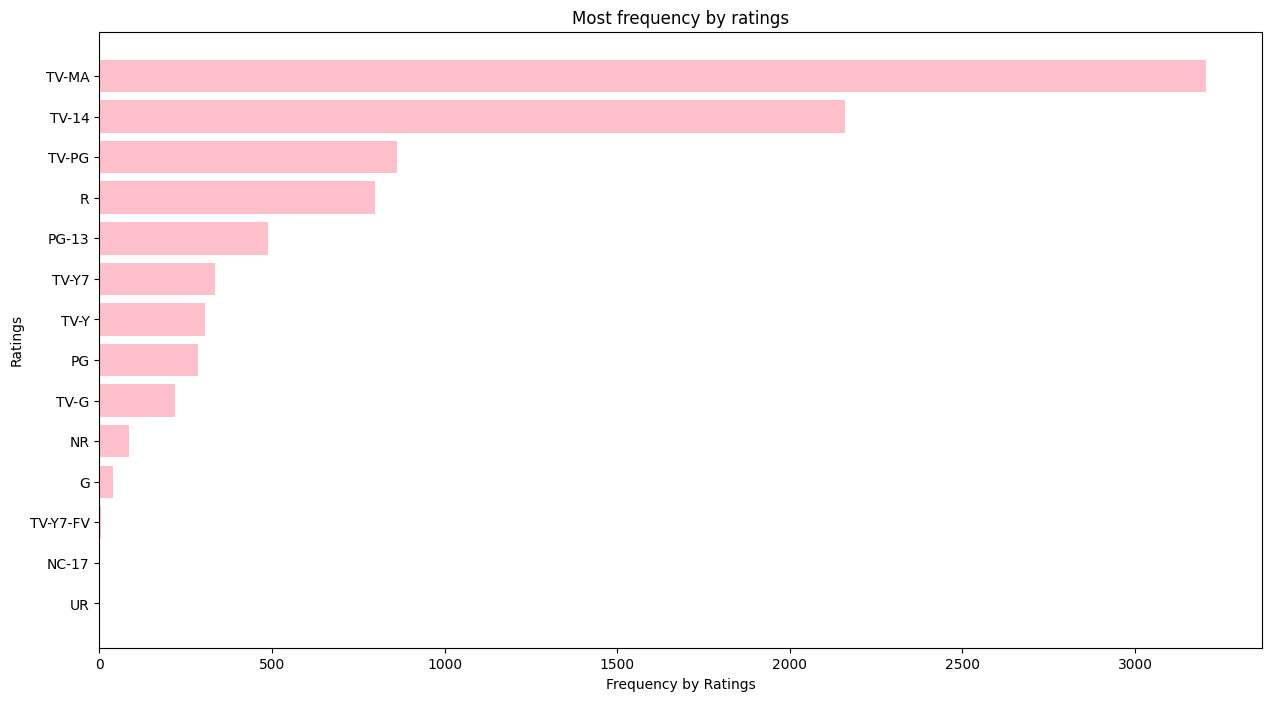

In [158]:
df_rating=final_df_clone.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['pink'])
plt.title("Most frequency by ratings")
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

**Observations:**


*   Most famous titles across Netflix have mature audience content.
*   Movies/TVShows are famous for age group 14 years and above.



# Month and Week when most releases happen

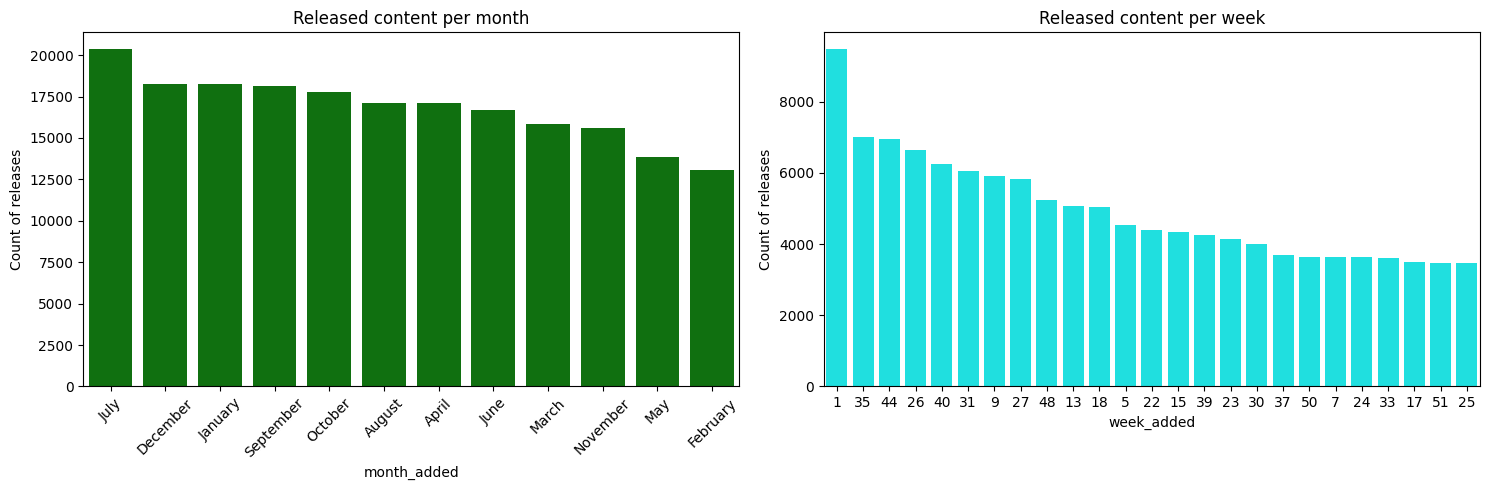

In [159]:
release_month = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
final_df_clone["month_added"] = final_df_clone["month_added"].replace(release_month)
final_df_clone.head()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
sns.countplot(x='month_added', data=final_df_clone, order=final_df_clone['month_added'].value_counts().index[0:12], color='green', ax=axes[0])
axes[0].set_title('Released content per month')
axes[0].set_ylabel('Count of releases')



sns.countplot(x='week_added', data=final_df_clone, order=final_df_clone['week_added'].value_counts().index[0:25], color='aqua', ax=axes[1])
axes[1].set_title('Released content per week')
axes[1].set_ylabel('Count of releases')
plt.tight_layout()
plt.show()

**Observation:**


*   July is the time when the most number of releases are done.
*   December, January and September follow close together at second place.
*   Most content is released in the first week of the year. This means that its in the holiday season.
*   The best time to relase is during summer and winter holidays.







# Releases across the years

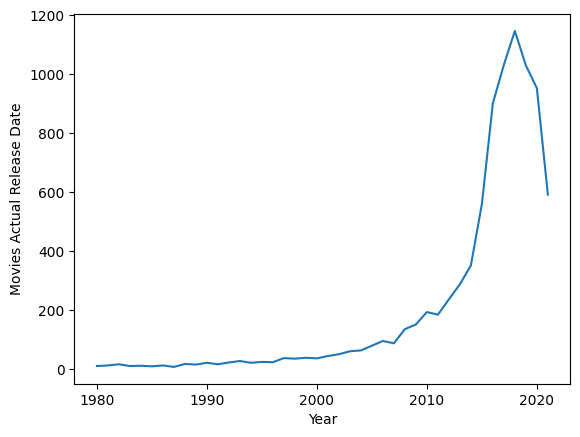

In [160]:
df_release_year = final_df_clone[final_df_clone['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data = df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

**Observations:**


*   The movie release frequency had increased and reached a peak at 2018 and then started to decline



# Duration of movies vs tv shows


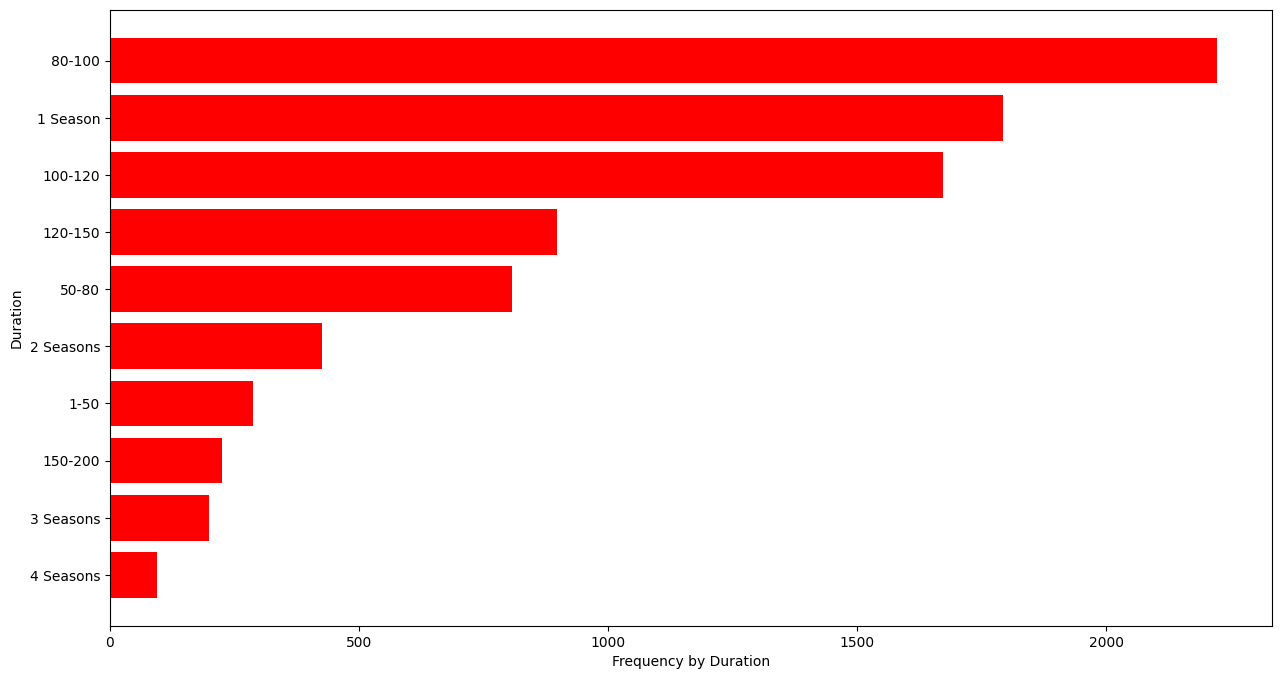

In [161]:
df_duration = final_df_clone.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['red'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

**Observations:**


*   Across movies 80-100,100-120 and 120-150 is the ranges of minutes for which most movies lie.
*   The range of movies hence needs to be in the range of 120 to 150 minutes



# Additional questions from the case study

Start by exploring a few questions:


*   What type of content is available in different countries?
*   How has the number of movies released per year changed over the last 20-30 years?
*   Comparison of tv shows vs. movies.
*   What is the best time to launch a TV show?
*   Analysis of actors/directors of different types of shows/movies.
*   Does Netflix has more focus on TV Shows than movies in recent years?


Lets work on shows and movies for United States and shows only for Japan

In [162]:
# define dataframe
df_usa_shows = final_df_clone[final_df_clone['country']=='United States'][final_df_clone[final_df_clone['country']=='United States']['type']=='TV Show']
df_usa_movies = final_df_clone[final_df_clone['country']=='United States'][final_df_clone[final_df_clone['country']=='United States']['type']=='Movie']

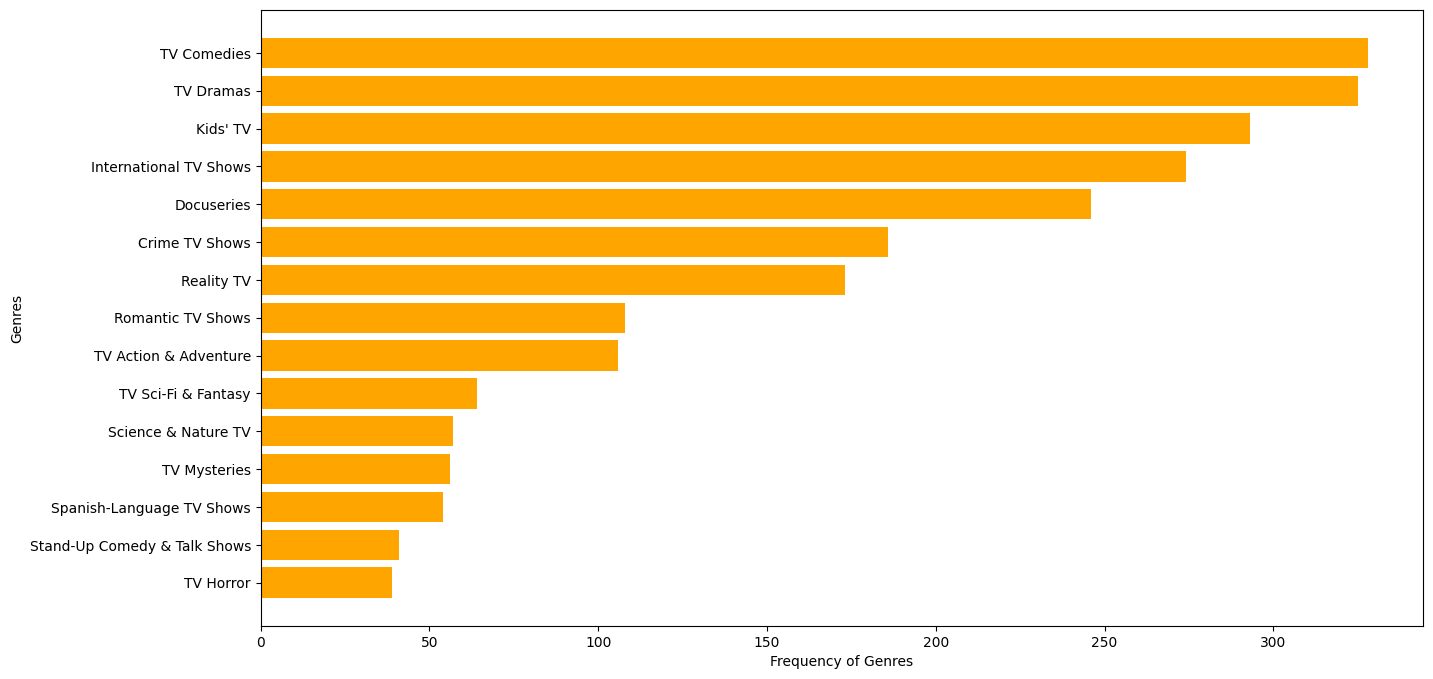

In [163]:
df_genre = df_usa_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

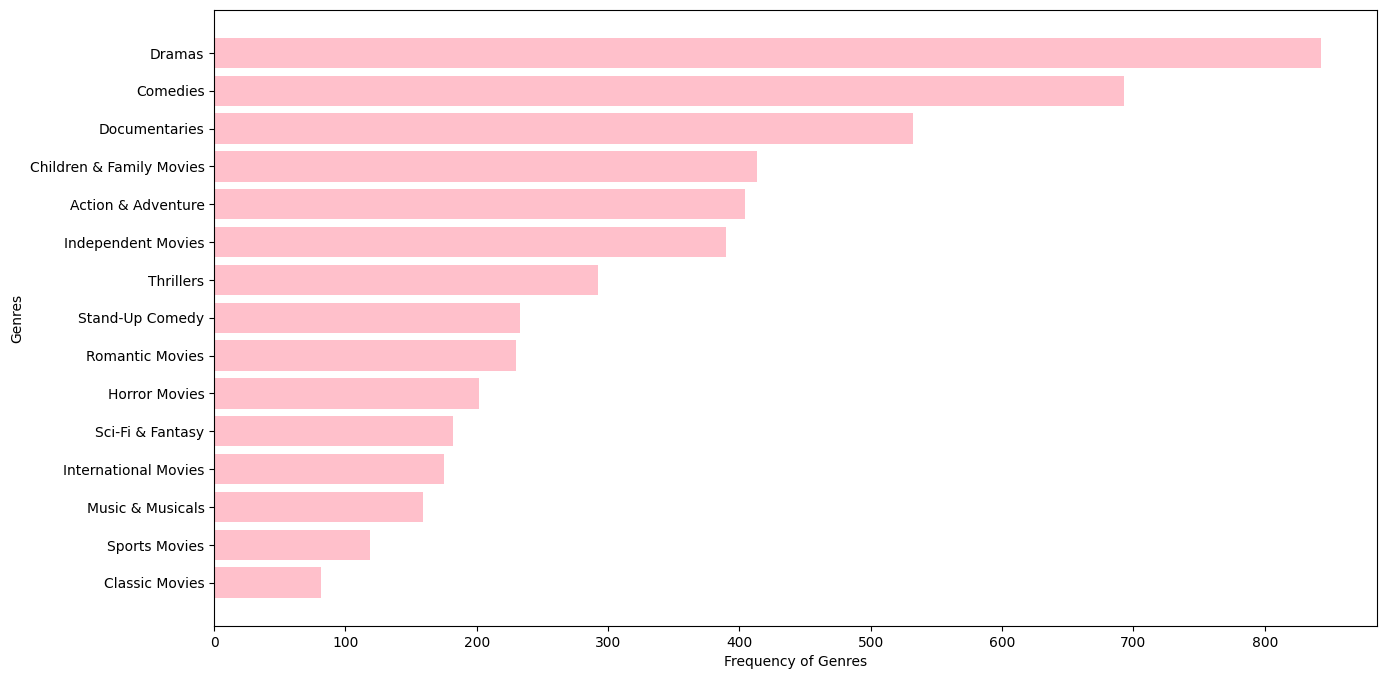

In [164]:
df_genre = df_usa_movies.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['pink'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

**Observations:**


*   TV_comedies, TV_drama, Kid' TV are the top 3 items for USA shows
*   Dramas, Comedies, Documentries are the top 3 items for USA movies



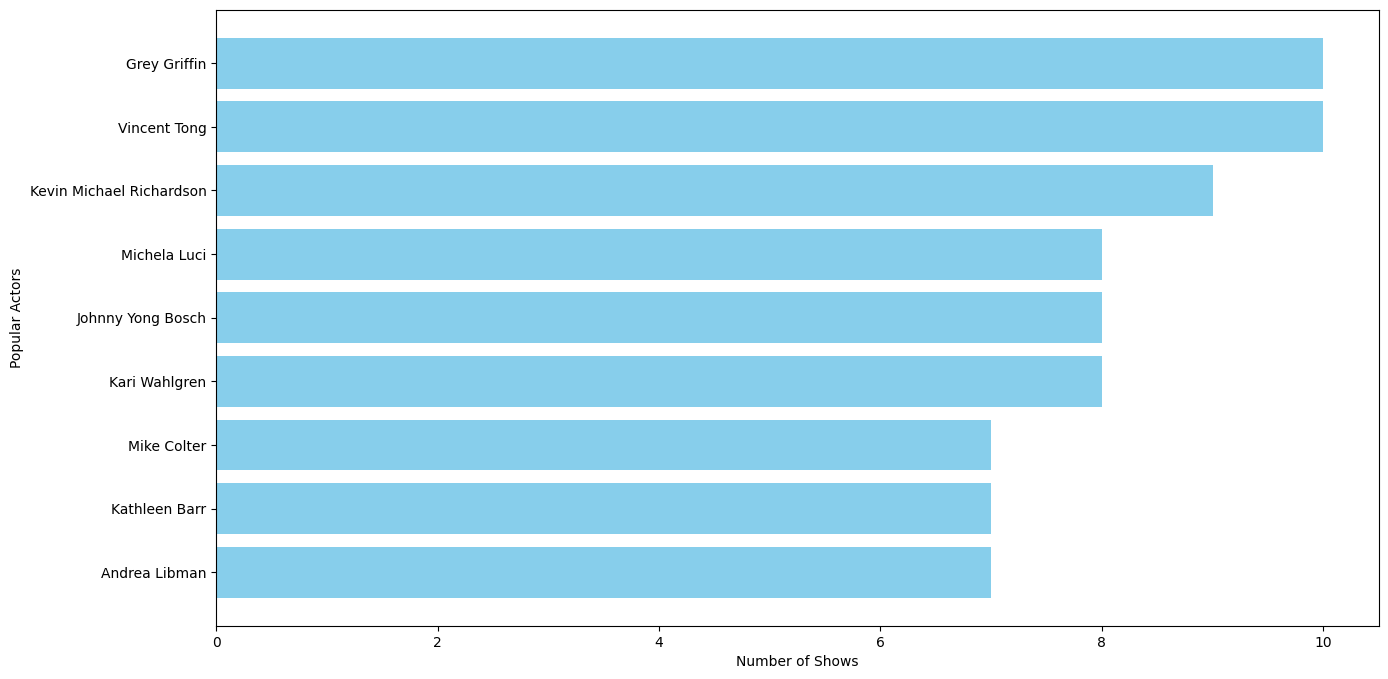

In [165]:
df_actors = df_usa_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors = df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['skyblue'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

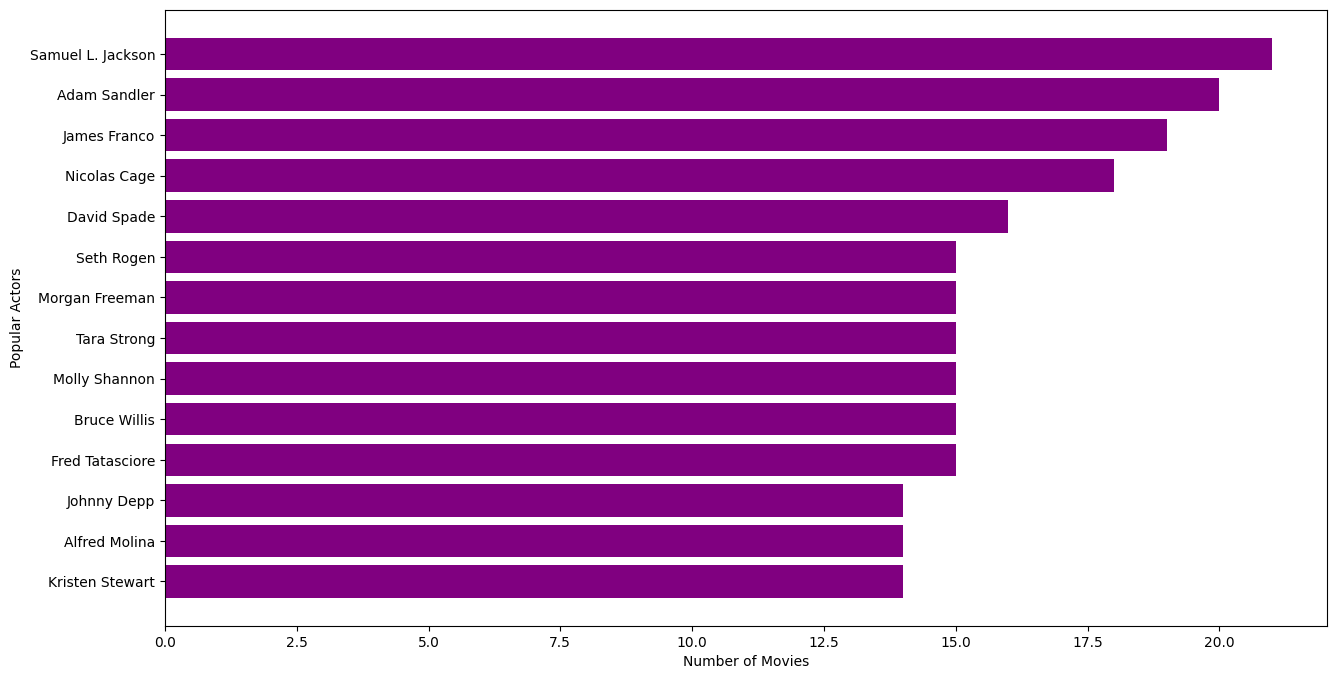

In [166]:
df_actors = df_usa_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors = df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['purple'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

**Observations:**


*   Grey griffin, Vincent Tong are the top actors of USA shows
*   Samuel L Jackson, Adam Sandler are the top actors for USA movies



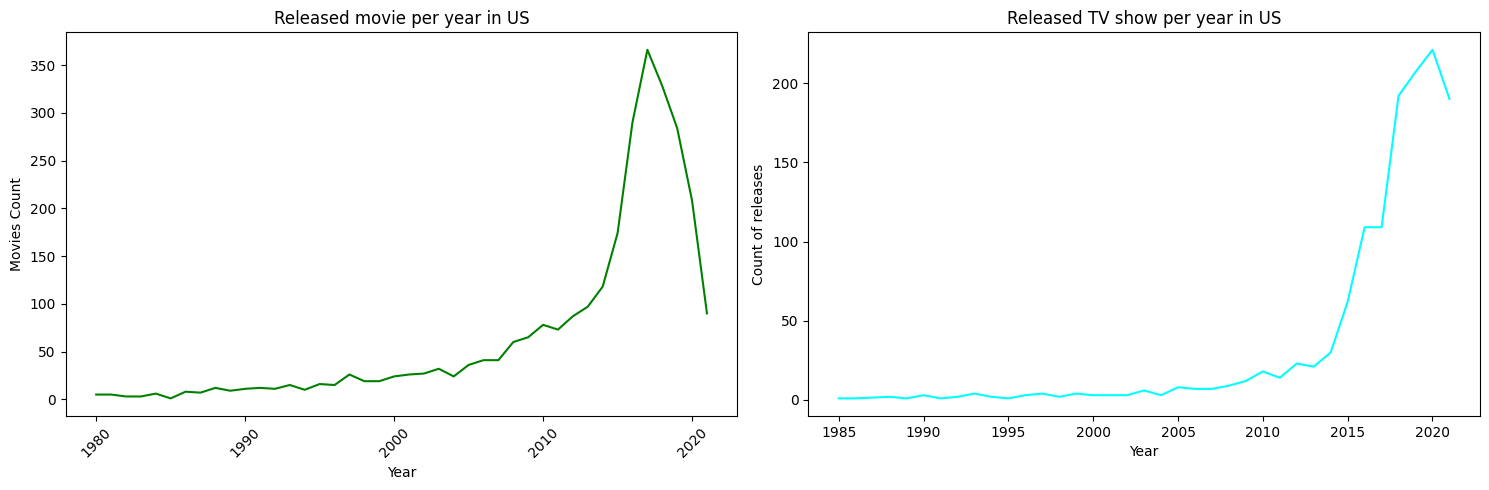

In [167]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
df_release_year = df_usa_movies[df_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title', color='green', ax=axes[0])
axes[0].set_title('Released movie per year in US')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Movies Count')


df_release_year=df_usa_shows[df_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title', color='aqua', ax=axes[1])
axes[1].set_title('Released TV show per year in US')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count of releases')
plt.tight_layout()
plt.show()

In [168]:
# actor dirrector combo
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.cast.str.cat(df_usa_movies.directors, sep=' and ')
df_usa_movies_subset = df_usa_movies[df_usa_movies['cast']!='Unknown Cast']
df_usa_movies_subset = df_usa_movies_subset[df_usa_movies_subset['directors']!='Unknown Director']
# df_usa_movies_subset.head()

df_usa_shows['Actor_Director_Combination'] = df_usa_shows.cast.str.cat(df_usa_shows.directors, sep=' and ')
df_usa_shows_subset = df_usa_shows[df_usa_shows['cast']!='Unknown Cast']
df_usa_shows_subset = df_usa_shows_subset[df_usa_shows_subset['directors']!='Unknown Director']
# df_usa_shows_subset.head()

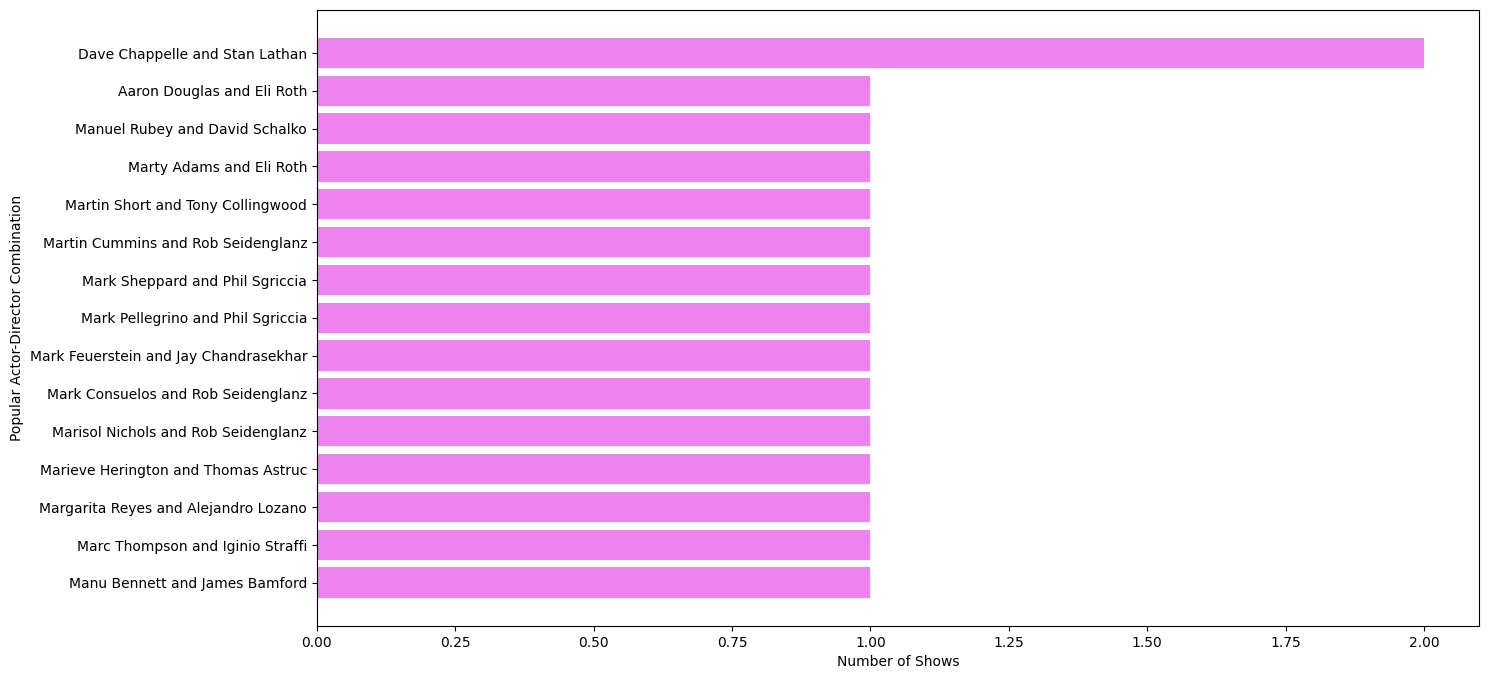

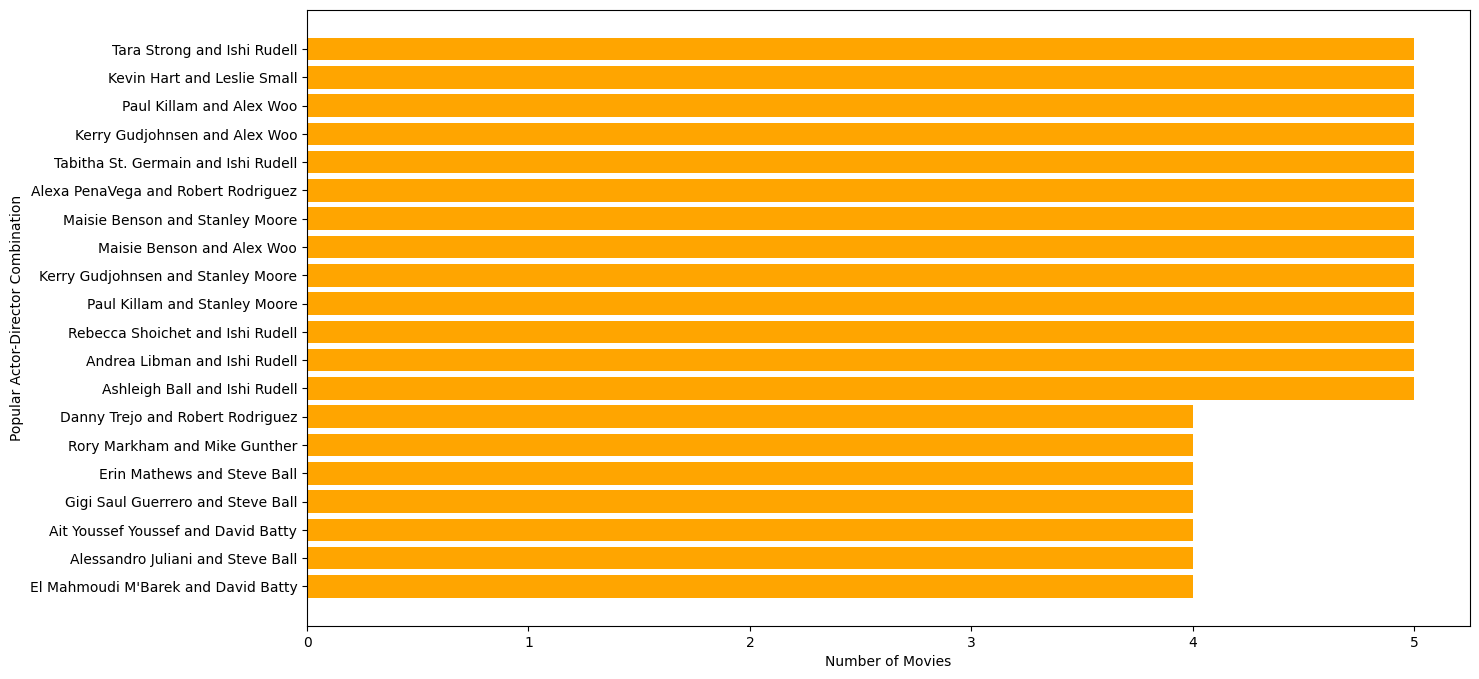

In [169]:
df_actors_directors=df_usa_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['violet'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

df_actors_directors=df_usa_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['orange'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

# Map Japan

In [170]:
df_japan_shows = final_df_clone[final_df_clone['country']=='Japan'][final_df_clone[final_df_clone['country']=='Japan']['type']=='TV Show']
df_japan_shows.head()

,title,directors,cast,country,genre,show_id,type,date_added,release_year,rating,duration,modified_added_date,month_added,week_added,year
1754,Yowamushi Pedal,Unknown Director,Daiki Yamashita,Japan,Anime Series,s77,TV Show,"September 14, 2021",2013,TV-14,1 Season,2021-09-14,September,37,2021
1755,Yowamushi Pedal,Unknown Director,Daiki Yamashita,Japan,International TV Shows,s77,TV Show,"September 14, 2021",2013,TV-14,1 Season,2021-09-14,September,37,2021
1756,Yowamushi Pedal,Unknown Director,Kohsuke Toriumi,Japan,Anime Series,s77,TV Show,"September 14, 2021",2013,TV-14,1 Season,2021-09-14,September,37,2021
1757,Yowamushi Pedal,Unknown Director,Kohsuke Toriumi,Japan,International TV Shows,s77,TV Show,"September 14, 2021",2013,TV-14,1 Season,2021-09-14,September,37,2021
1758,Yowamushi Pedal,Unknown Director,Jun Fukushima,Japan,Anime Series,s77,TV Show,"September 14, 2021",2013,TV-14,1 Season,2021-09-14,September,37,2021


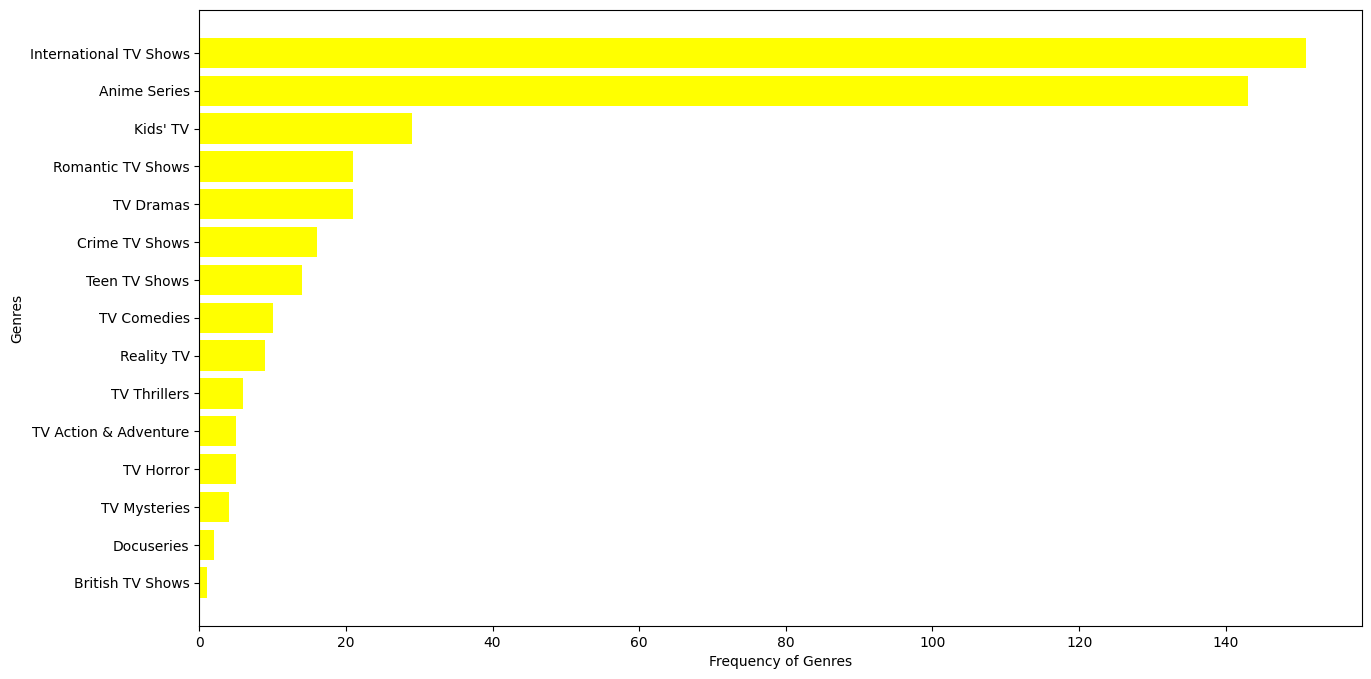

In [171]:
df_genre = df_japan_shows.groupby(['genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genre'], df_genre[::-1]['title'],color=['yellow'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

**Observations:**

International TV shows, Anime and Kid's TV are famous in Japan

This is similar to all analysis that we have done till now.

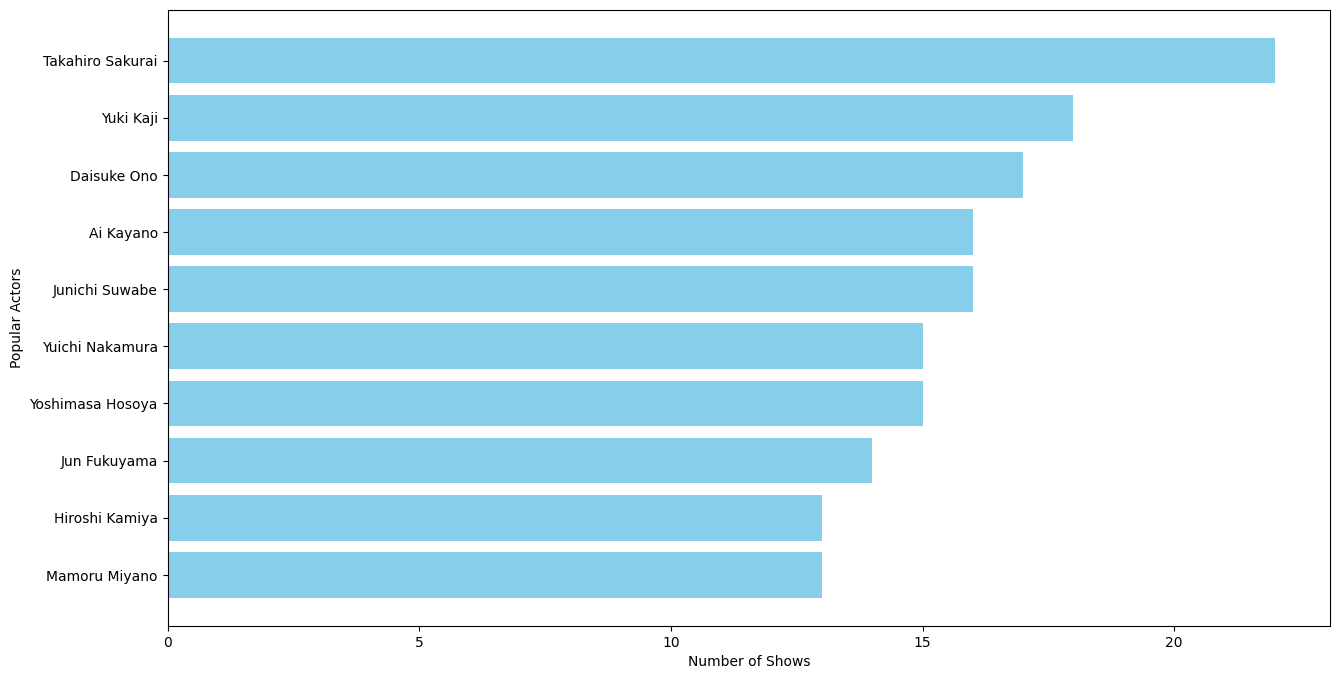

In [172]:
df_actors = df_japan_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors = df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['skyblue'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

**Observations:**

Takahiro Sakurai is the most famous actor.

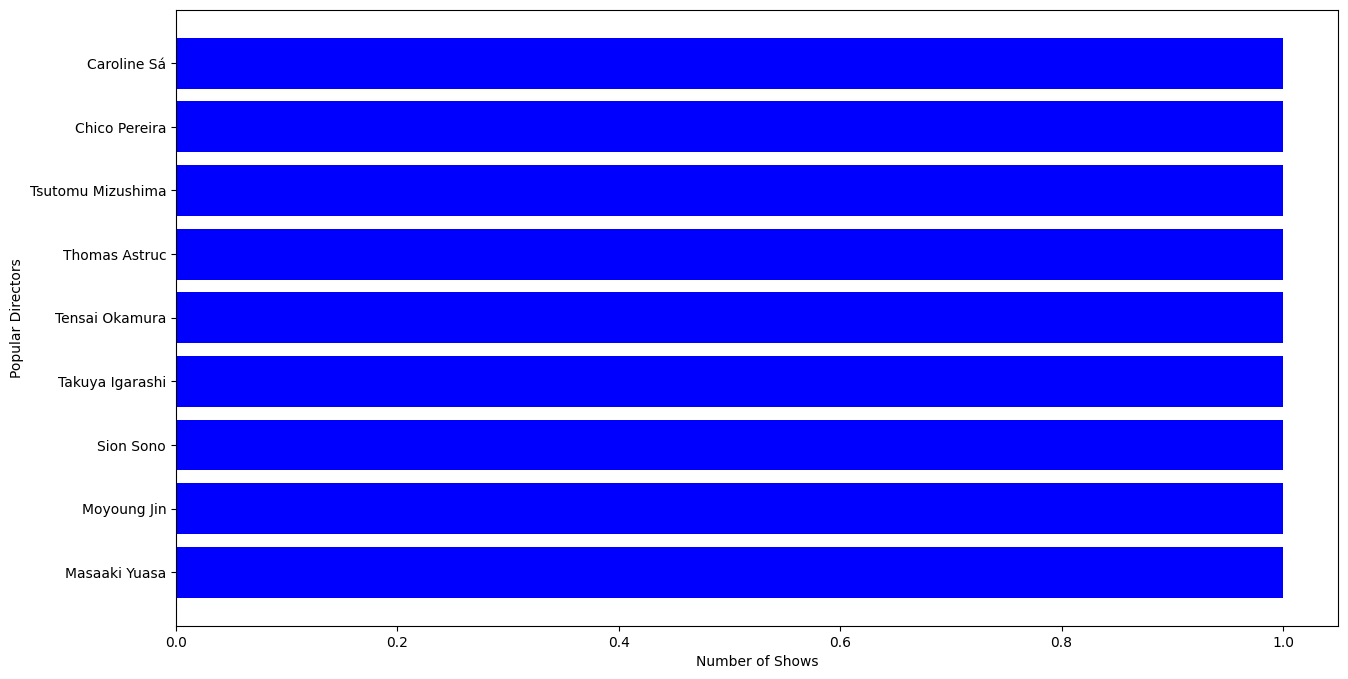

In [173]:
df_directors = df_japan_shows.groupby(['directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors = df_directors[df_directors['directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['directors'], df_directors[::-1]['title'],color=['blue'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Directors')
plt.show()

**Observations:**

All directors have directed only once.

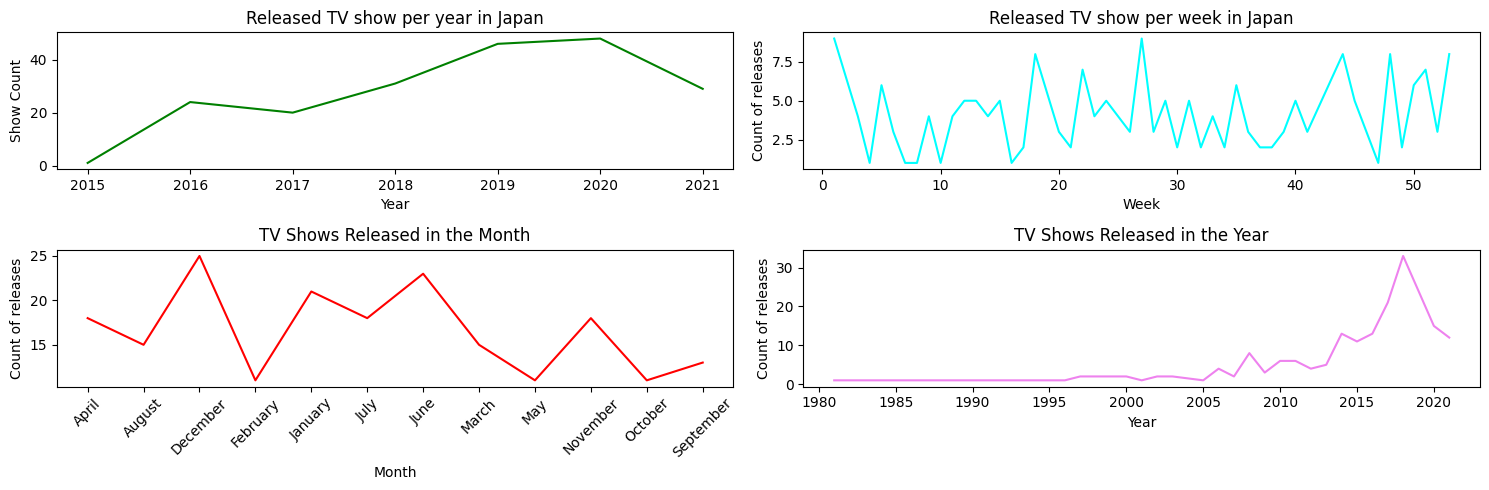

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
# plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45)
df_year=df_japan_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title', color='green', ax=axes[0][0])
axes[0][0].set_title('Released TV show per year in Japan')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Show Count')


df_week = df_japan_shows.groupby(['week_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_week, x='week_added', y='title',color='aqua', ax=axes[0][1])
axes[0][1].set_title('Released TV show per week in Japan')
axes[0][1].set_xlabel('Week')
axes[0][1].set_ylabel('Count of releases')

df_month=df_japan_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
plt.setp(axes[1][0].xaxis.get_majorticklabels(), rotation=45)
sns.lineplot(data=df_month, x='month_added', y='title', color='red', ax=axes[1][0])
axes[1][0].set_title('TV Shows Released in the Month')
axes[1][0].set_xlabel('Month')
axes[1][0].set_ylabel('Count of releases')

df_release_year = df_japan_shows[df_japan_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title', color='violet', ax=axes[1][1])
axes[1][1].set_title('TV Shows Released in the Year')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Count of releases')


plt.tight_layout()
plt.show()